# Multi-class Classification and Neural Networks

In [8]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sop
from scipy.io import loadmat

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Multi-class Classification

### Read Data

In [2]:
data = loadmat('data/ex3data1.mat')
X = data['X']
y = data['y']

### Visualize Data

In [3]:
# Function to show some random immages of handwritten numbers
def display_data(X, nr_examples):
    m, n = X.shape
    example_width = int(np.round(np.sqrt(n)))
    example_height = n // example_width
    
    display_rows = int(np.floor(np.sqrt(nr_examples)))
    display_cols = int(np.ceil(nr_examples / display_rows))
    
    _, axarr = plt.subplots(display_rows, display_cols, figsize=(display_rows, display_cols))
    
    for i in range(display_rows):
        for j in range(display_cols):
            axarr[i,j].imshow(X[np.random.randint(m)].reshape(example_width, example_height, order = 'F'), 
                              cmap='gray')
            axarr[i,j].axis('off')

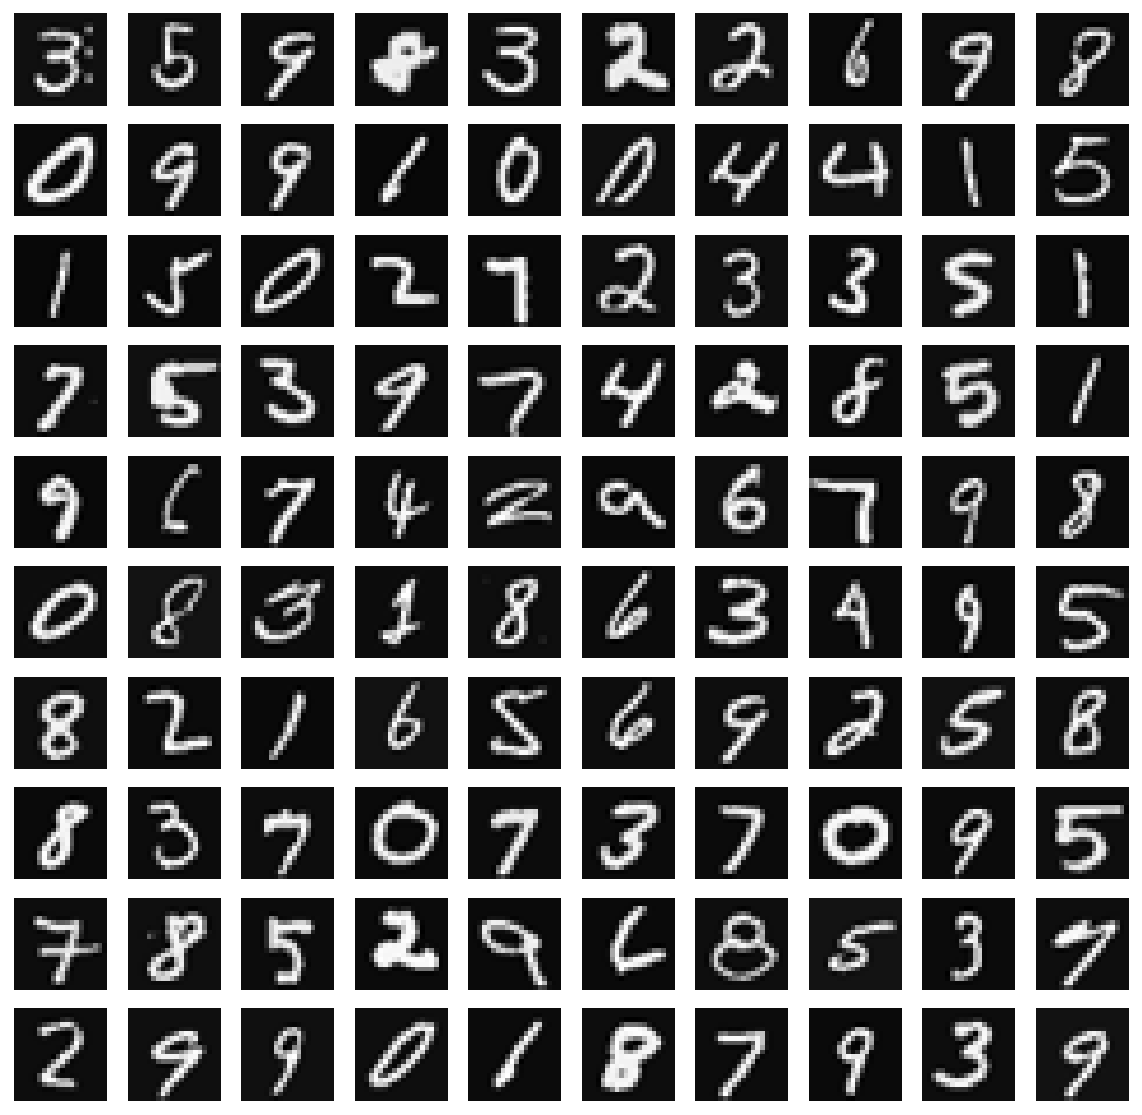

In [4]:
display_data(X, 100)

### Model

In [5]:
# Define model (uses l2-regularization by default), C = 10 is eqivalent to lambda = 0.01, ovr = one vs rest
multi_log_model = LogisticRegression(solver='liblinear', C=10, multi_class='ovr')

#train model
multi_log_model.fit(X, y.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Results

In [6]:
# Calculate training set accuracy
multi_log_model.score(X, y)

0.965

In [9]:
y_pred = multi_log_model.predict(X)

In [10]:
# Confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y, y_pred), range(1, 11), range(1, 11))
confusion_matrix_df

,1,2,3,4,5,6,7,8,9,10
1,498,1,0,0,0,0,0,1,0,0
2,2,476,1,3,1,0,2,11,3,1
3,2,7,469,1,9,0,4,3,5,0
4,1,1,0,488,0,1,0,2,7,0
5,0,2,6,3,475,3,1,7,3,0
6,0,0,0,0,1,497,0,1,0,1
7,0,2,0,2,0,0,485,2,9,0
8,5,3,5,6,4,2,1,469,5,0
9,1,2,5,6,3,1,11,1,469,1
10,0,0,0,0,0,0,0,1,0,499


In [11]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       500
           2       0.96      0.95      0.96       500
           3       0.97      0.94      0.95       500
           4       0.96      0.98      0.97       500
           5       0.96      0.95      0.96       500
           6       0.99      0.99      0.99       500
           7       0.96      0.97      0.97       500
           8       0.94      0.94      0.94       500
           9       0.94      0.94      0.94       500
          10       0.99      1.00      1.00       500

    accuracy                           0.96      5000
   macro avg       0.96      0.97      0.96      5000
weighted avg       0.96      0.96      0.96      5000



## Neural Networks 
$\rightarrow$ see Ex4